In [1]:
import torch
import numpy as np
import pandas as pd
from torch import nn
import cnn_utils
import matplotlib.pyplot as plt
from torch import optim


c:\Programy\anaconda3\envs\Torch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load data

In [2]:
train_loader, val_loader = cnn_utils.load_data("Data\\train.csv", 28, 28)

## Neural network

### Setting device

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


### Model's definition

Architecture: https://arxiv.org/ftp/arxiv/papers/2004/2004.00331.pdf

In [40]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.drop = 0.3
        self.seq1 = nn.Sequential(
            nn.Conv2d(1, 32, 5, padding=2),
            nn.MaxPool2d(2),
            nn.Dropout(0.3)
        )
        self.seq2 = nn.Sequential(
            nn.Conv2d(32, 64, 5, padding=2),
            nn.MaxPool2d(2),
            nn.Dropout(0.3)
        )
        self.seq3 = nn.Sequential(
            nn.Conv2d(64, 64, 5, padding=2),
            nn.Flatten(start_dim=1, end_dim=3),
            nn.Linear(3136, 64),
            nn.Dropout(0.3)
        )
        self.dense = nn.Linear(64, 10)

    def forward(self, x):
        x = self.seq1(x)
        x = self.seq2(x)
        x = self.seq3(x)
        label = self.dense(x)
        return label

### Training process

In [20]:
def training(model, train_loader, val_loader, optimizer, loss_fn, n_epochs):
    accs = []
    for epoch in range(n_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            y_pred = model(X_batch.to(device))
            loss = loss_fn(y_pred, y_batch.to(device))
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        # Validation
        model.eval()
        acc = 0
        count = 0
        for X_batch, y_batch in val_loader:
            y_pred = model(X_batch.to(device))
            acc += (torch.argmax(y_pred, 1) == y_batch.to(device)).float().sum()
            count += len(y_batch)
        acc = acc / count
        print("Epoch %d: model accuracy %.2f%%" % (epoch, acc*100))
        accs.append(acc.item())

    return accs

Epoch 0: model accuracy 88.56%
Epoch 1: model accuracy 93.52%
Epoch 2: model accuracy 95.40%
Epoch 3: model accuracy 97.70%
Epoch 4: model accuracy 97.00%
Epoch 5: model accuracy 97.64%
Epoch 6: model accuracy 97.80%
Epoch 7: model accuracy 97.92%
Epoch 8: model accuracy 97.99%
Epoch 9: model accuracy 98.00%
Epoch 10: model accuracy 97.62%
Epoch 11: model accuracy 97.10%
Epoch 12: model accuracy 96.82%
Epoch 13: model accuracy 96.51%
Epoch 14: model accuracy 96.67%
Epoch 15: model accuracy 96.42%
Epoch 16: model accuracy 96.68%
Epoch 17: model accuracy 95.51%
Epoch 18: model accuracy 96.93%
Epoch 19: model accuracy 96.23%


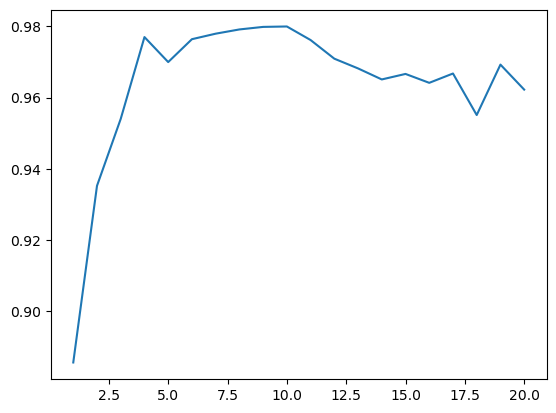

In [41]:
model = CNN()
model = model.to(device)
 
optimizer = optim.Adam(model.parameters())
loss_fn = nn.CrossEntropyLoss()

n_epochs = 20

accs = training(model, train_loader, val_loader, optimizer, loss_fn, n_epochs)
cnn_utils.plot_acc(accs)

### Zoomed data

In [42]:
train_loader, val_loader = cnn_utils.load_data("Data\\train_zoomed.csv", 28, 28)

Epoch 0: model accuracy 84.12%
Epoch 1: model accuracy 90.90%
Epoch 2: model accuracy 94.87%
Epoch 3: model accuracy 96.43%
Epoch 4: model accuracy 96.08%
Epoch 5: model accuracy 97.05%
Epoch 6: model accuracy 96.07%
Epoch 7: model accuracy 96.88%
Epoch 8: model accuracy 96.69%
Epoch 9: model accuracy 96.82%
Epoch 10: model accuracy 97.24%
Epoch 11: model accuracy 95.86%
Epoch 12: model accuracy 97.21%
Epoch 13: model accuracy 96.34%
Epoch 14: model accuracy 96.85%
Epoch 15: model accuracy 95.97%
Epoch 16: model accuracy 96.37%
Epoch 17: model accuracy 96.23%
Epoch 18: model accuracy 95.52%
Epoch 19: model accuracy 95.04%


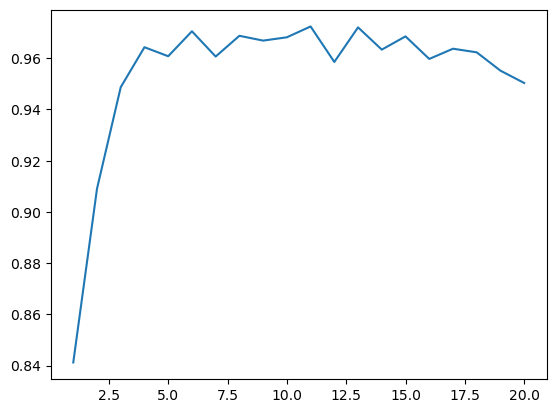

In [43]:
model = CNN()
model = model.to(device)
 
optimizer = optim.Adam(model.parameters())
loss_fn = nn.CrossEntropyLoss()

n_epochs = 20

accs = training(model, train_loader, val_loader, optimizer, loss_fn, n_epochs)
cnn_utils.plot_acc(accs)